<a href="https://colab.research.google.com/github/s1ms2l8/analise-base-imdb/blob/main/an%C3%A1lise_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

---


## Análise de dados para criação de um artigo


### **Tema:** <font size='4.dp'> Avaliações de Filmes no Imdb


### **Objetivos:**
  *   Identificar dualidade de notas em filmes block busters
  *   Comparar gêneros com uma média de avaliação mais alta e mais baixa
  *   Validar globalização da cultura através da língua original do filme

### **Base de dados:** [IMDB movies dataset](https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset)






# Importando os Dados

---



In [130]:
import numpy as np  #Biblioteca responsável por operações matemáticas
import pandas as pd # Biblioteca responsável pela manipulação de dados
import matplotlib.pyplot as plt # Biblioteca responsável pela visualização de dados
import seaborn as sns # Biblioteca de visualização de dados em alto nível


In [131]:
df = pd.read_excel('/content/drive/MyDrive/imdb_movies.xlsx') #Leitura dos dados para um dataframe (df)

In [132]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-02-03 00:00:00,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-05-04 00:00:00,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-05-01 00:00:00,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


#Limpeza e transformação

---



In [134]:
df.duplicated().sum()

0

<Axes: >

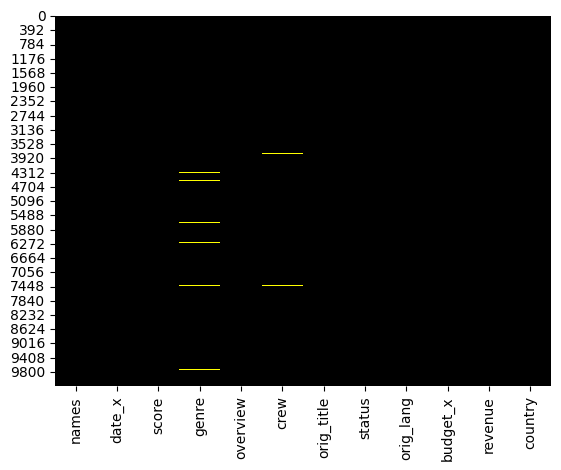

In [135]:
sns.heatmap(df.isnull(),
            cbar = False,
            cmap = 'gnuplot')

In [136]:
nanMovies = []
for row in range(0, len(df['genre'])):
  if (df['genre'].isnull()[row] or df['crew'].isnull()[row]):
    nanMovies.append(df['names'][row])

In [137]:
print(len(nanMovies))

126


In [138]:
i=0

for row in range(0, len(df)):
  if (df['genre'].isnull()[row]):
    i += 1

print (i)

85


> 126 filmes sem gênero ou Cast de atuação, representa 1,24% da base de dados

---



In [139]:
df.rename(columns={'names':'nome', 'date_x':'lançamento', 'genre':'genero', 'overview':'sinopse', 'crew':'elenco', 'orig_title':'titulo_orig', 'orig_lang':'idioma_orig', 'budget_x':'orçamento', 'revenue':'bilheteria', 'country':'pais_orig'}, inplace = True)

In [140]:
df['status'].unique()

array(['Released', 'Post Production', 'In Production'], dtype=object)

In [141]:
for row in range(0, len(df)):
  if (df['status'][row] != 'Released' or df['genero'].isnull()[row] or df['elenco'].isnull()[row]):
    #dropa todo filme não lançado, sem gêneros ou Cast
    df.drop(row, inplace = True)

In [142]:
df['status'].unique()

array(['Released'], dtype=object)

In [143]:
df.drop(columns=['status'], inplace = True)

Removidos registros com status diferente de lançado devido não ser possível avaliar o desempenho de um filme que não foi lançado,

após isso coluna já não servia mais um propósito e também foi deletada

In [144]:
newIndex = []

for row in range(0, len(df)):
  newIndex.append(row)

df.reindex(newIndex)

,nome,lançamento,score,genero,sinopse,elenco,titulo_orig,idioma_orig,orçamento,bilheteria,pais_orig
0,Creed III,2023-02-03 00:00:00,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-05-04 00:00:00,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-05-01 00:00:00,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...
10002,Joe Dirt,2001-10-08 00:00:00,56.0,"Mystery, Adventure, Comedy, Romance, Drama","Joe Dirt is a janitor with a mullet hairdo, ac...","David Spade, Joe Dirt, Brittany Daniel, Brandy...",Joe Dirt,English,16000000.0,3.098770e+07,AU
10003,Domme,03/17/2023,55.0,Drama,A man spies on his neighbors because of the no...,"Ava Mendez, , Ali Asistio, , Mark Anthony Fern...",Domme,Tagalog,142000000.0,4.544886e+08,PH
10004,Excision,2012-02-11 00:00:00,62.0,"Drama, Horror",Alienated teen Pauline struggles with the pres...,"AnnaLynne McCord, Pauline, Traci Lords, Phylli...",Excision,English,112000000.0,2.818232e+08,US
10005,The Boat That Rocked,2009-09-04 00:00:00,73.0,"Drama, Comedy","An ensemble comedy, where the romance is betwe...","Tom Sturridge, Carl, Philip Seymour Hoffman, T...",The Boat That Rocked,English,50000000.0,3.747265e+07,AU


In [162]:
generos = []

for row in range(0, len(df)):
  generos.append(str(df['genero'].iloc[row]).split(u',\xa0'))

df['genero'] = generos

In [165]:
generos

<bound method Series.unique of 0                                          [Drama, Action]
1                     [Science Fiction, Adventure, Action]
2          [Animation, Adventure, Family, Fantasy, Comedy]
3          [Animation, Comedy, Family, Adventure, Fantasy]
4                                                 [Action]
                               ...                        
10173                                              [Drama]
10174                                             [Action]
10175                           [Drama, Thriller, Romance]
10176    [Action, Adventure, Science Fiction, Thriller,...
10177                         [Animation, Family, Fantasy]
Name: genero, Length: 10007, dtype: object>

In [166]:
generos = []

for i in range(0, len(df)):
  for j in range(0, len(df['genero'].iloc[i])):
    if df['genero'].iloc[i][j] not in generos:
      generos.append(df['genero'].iloc[i][j])

generos

['Drama',
 'Action',
 'Science Fiction',
 'Adventure',
 'Animation',
 'Family',
 'Fantasy',
 'Comedy',
 'Thriller',
 'Crime',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Documentary',
 'Romance',
 'Music',
 'Western',
 'TV Movie']